# EDA for Cab database

## Basic setup

Loading packages:
- pandas (pd) to load and manage the db
- numpy (np) mainly to access NaN
- matplotlib. It's called through pandas, but I need import it directly to rotate the x-labels.
- seaborn (sns) for simple plotting.
    - selecting the basic theme

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import seaborn as sns
# sns.set_theme()

Loading the different parts of the database.

In [22]:
trips = pd.read_csv("datasets/Cab_Data.csv")
customers = pd.read_csv("datasets/Customer_ID.csv")
cities = pd.read_csv("datasets/City.csv")
transactions = pd.read_csv("datasets/Transaction_ID.csv")

## Univariate analysis
In the following snippets I explore fields individually. I focus on the "main" dataset, ```trips``` (```Cab_Data.csv```).

Let's look at the missing entries in each field:

In [23]:
# Number of entries
entry_count = trips.shape[0]
print(f"Number of entries: {entry_count}\n")
print(f"Fraction of available entries per field:\n{trips.count() / entry_count}\n")
print(f"Data types of each field:\n{trips.dtypes}")

Number of entries: 359392

Fraction of available entries per field:
Transaction ID    1.0
Date of Travel    1.0
Company           1.0
City              1.0
KM Travelled      1.0
Price Charged     1.0
Cost of Trip      1.0
dtype: float64

Data types of each field:
Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


On a first look all entries are completelly filled. However, missing values might still be present in other poorly formated shapes (e.g. strings containing "NaN" literally).

The data types seem to be correct, although the format of the dates is not intuitive and needs processing. 


### Transaction ID:
There are no apparent missing values, so for now we just check the field's range and it's unique values.

In [24]:
ids = trips["Transaction ID"]
print(ids)

print(f"\nNumber of entries: {ids.count()}")
print(f"Unique values {len(ids.unique())}")
print(f"Range of the IDs: [{ids.min()}-{ids.max()}]")
print(f"Size of the range: {ids.max()- ids.min()}")

0         10000011
1         10000012
2         10000013
3         10000014
4         10000015
            ...   
359387    10440101
359388    10440104
359389    10440105
359390    10440106
359391    10440107
Name: Transaction ID, Length: 359392, dtype: int64

Number of entries: 359392
Unique values 359392
Range of the IDs: [10000011-10440107]
Size of the range: 440096


There are as many unique values as entries, which means that each row is properly identified by its ID.

As an observation, it seems that each consecutive ID increments in 1. While the range suggests that there have been around 440000 entries, we only have access to around 360000. This could mean, for example, that the database has already been cleaned of missing entries or outliers.

### Date of Travel
As I mentioned before, this field should be propperly formatted. In the assignment text it is mentioned that the database is included in a period ranging from 31/01/2016 to 31/12/2018. If the integer at the ```Date of Travel``` field represents days, then there should be over 1000 of them (~3 years):

In [25]:
time = trips["Date of Travel"]
time.max() - time.min()

1094

This seems to indicate that the dates are measured in days. With this information, let's transform the format of the dates into a more readable format:

In [26]:
origin = pd.to_datetime("31/01/2016")
trips["Date of Travel"] = origin + pd.to_timedelta(time - time.min(), unit="D")
print(trips["Date of Travel"])
print(f"\nFirst day: {trips['Date of Travel'].min()}")
print(f"\nLast day: {trips['Date of Travel'].max()}")

0        2016-02-06
1        2016-02-04
2        2016-01-31
3        2016-02-05
4        2016-02-01
            ...    
359387   2018-02-06
359388   2018-02-02
359389   2018-02-03
359390   2018-02-03
359391   2018-01-31
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

First day: 2016-01-31 00:00:00

Last day: 2019-01-29 00:00:00


A time variable is quite juicy. Let's see how the amount of entries varies per month (approx).

<AxesSubplot:>

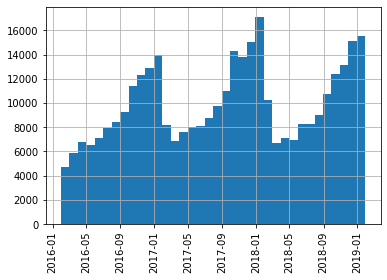

In [28]:
plt.xticks(rotation='vertical')
trips["Date of Travel"].hist(bins = 12 * 3)

A clear seasonality can be appreciated, although I do not intend to do a proper analysis in this EDA. Let's move on with the next field:

### Company
This is clearly a categorical field, so let's check which categories are present.

In [8]:
trips["Company"].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

Two observations from this line:
- There are only two companies: "Pink Cab" and "Yellow Cab".
- There is no missing data, since we know that every entry is filled with either "Pink Cab" or "Yellow Cab" (i.e., there are no values with "missing", "error" or similar).

Lastly for this field let's check how do these two companies compare in amount of trips:

<AxesSubplot:>

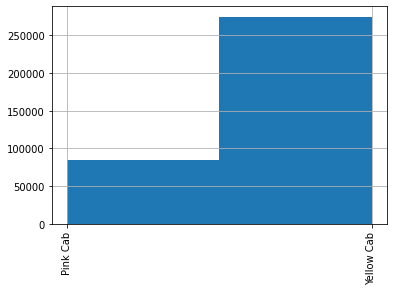

In [29]:
plt.xticks(rotation='vertical')
trips["Company"].hist(bins = 2)

For this time period, "Yellow Cab" has had around 3 times as many transactions as "Pink Cab". Take into account that that doesn't mean that they made 3 times as much money, for example, since other factors such as the comission margin or the distance of the trips might influence the profit.

### City
Another categorical field. Let's see its possible values:

In [30]:
cities = trips["City"]
cities.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

Just like with companies, every entry seems to be a propper city. If one wanted to process this field they should be careful, though, since the formats vary: e.g. ```SILICON VALLEY``` has two words but no state or ```NEW YORK NY``` has three words (with state).
Let's see how many transactions there are per city:

<AxesSubplot:>

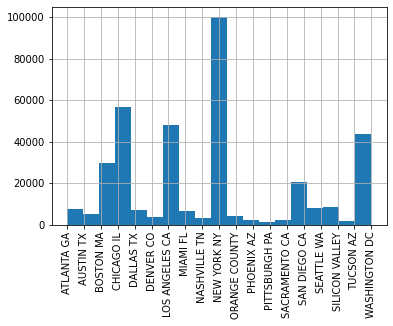

In [34]:
plt.xticks(rotation='vertical')
cities.hist(bins = len(cities.unique()))

The dominant cities/areas are New York, Chicago, LA and Washington. These are also the most populated cities in USA: the dataset is asking us to compare this transactions with the population of the cities. This, however, should be attended in a proper analysis and not in the EDA.

### KM Travelled
This is a straightforward numerical value. Let's see what is its distribution: 

<AxesSubplot:>

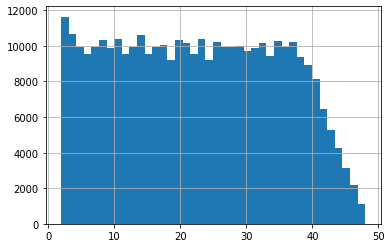

In [38]:
kms = trips["KM Travelled"]
kms.hist(bins=40)

A pretty uniform distribution, with a slight increase in trips less than 5km and a linear decay from 40 to 50 km. Apaprently not a single transaction over 50km has been recorded in this database.

### Price Charged and Cost of Trip
These are twin values. Let's check their distribution:

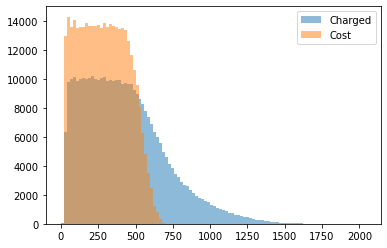

In [48]:
charged = trips["Price Charged"]
cost = trips["Cost of Trip"]
bins = list(range(0, int(charged.max()), 20))
plt.hist(charged, alpha = 0.5, bins=bins, label="Charged")
plt.hist(cost, alpha = 0.5, bins=bins, label="Cost")
plt.legend()
plt.show()

The charged prices has a higher distribution of values than the cost prices, as expected. Notice, though, that one distribution is not just a translated version of the other. This indicates that the profit margin is variable with the cost.

Talking about margin, that is an interesting field to consider. Let's include it in the database and see how it relates, for example, to the traveled km:

In [58]:
trips["Margin"] = charged - cost
lowest = int(trips["Margin"].min())
highest = int(trips["Margin"].max())
print(f'Range of the margin: [{lowest}$ to {highest}$]')

Range of the margin: [-220$ to 1463$]


That's unexpected! it seems that for some trips there have been losses (negative profit)! Let's see how the margin relates to the cost:

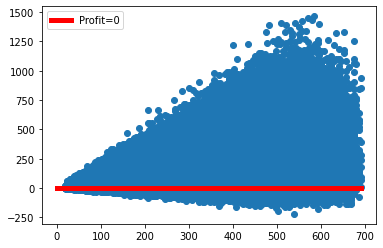

In [71]:
plt.scatter(cost, trips["Margin"])
plt.plot([0, cost.max()], [0, 0], c="r", linewidth=5, label="Profit=0")
plt.legend()

As we can see, most of the points have a positive profit, but there is still a lot of points where are losses. Finally, let's check what's the proportion between this points.

In [75]:
total_transactions = trips["Margin"].count()
losses_transactions = trips["Margin"].loc[trips["Margin"] < 0].count()
print(f"Percentage of trips with losses: {(100 * losses_transactions) // total_transactions}%")

Percentage of trips with losses: 6%
